##                                  HEART DISEASE PREDICTION USING MACHINE LEARNING

In [ ]:
# Predicting heart disease using machine learning 

# This notebook looks into using various Python-based machine learning and data science libraries to build a machine learning model capable of 
# predicting whether or not someone has heart disease based on their medical attributes.

# Approach:
# 1. Problem Definition
# 2. Data
# 3. Evaluation
# 4. Features
# 5. Modelling
# 6. Experimentation

#  1. Problem Definition

# In a statement,
# > Given clinical parameters about a patient can we predict whether or not they have heart disease?

#  2. Data
# This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate
# numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting 
# blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak ST depression induced by exercise 
# relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. 

# The original data came from the Cleavland data from the UCI Machine learning Repository.
# https://archive.ics.uci.edu/dataset/45/heart+disease
# There is also a version available on Kaggle ->  https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

# 3. Evaluation 
# > Accuracy  (reaching 90% above)

# 4. Features


# 1)age - age in years
# 2)sex - (1 = male; 0 = female)
# 3)cp - chest pain type
#     0: Typical angina: chest pain related decrease blood supply to the heart
#     1: Atypical angina: chest pain not related to heart
#     2: Non-anginal pain: typically esophageal spasms (non heart related)
#     3: Asymptomatic: chest pain not showing signs of disease
# 4)trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
# 5)chol - serum cholestoral in mg/dl
#     serum = LDL + HDL + .2 * triglycerides
#     above 200 is cause for concern
# 6)fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#     >126' mg/dL signals diabetes
# 7)restecg - resting electrocardiographic results
#     0: Nothing to note
#     1: ST-T Wave abnormality
#     can range from mild symptoms to severe problems
#     signals non-normal heart beat
#     2: Possible or definite left ventricular hypertrophy
#     Enlarged heart's main pumping chamber
# 8)thalach - maximum heart rate achieved
# 9)exang - exercise induced angina (1 = yes; 0 = no)
# 10)oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
# 11)slope - the slope of the peak exercise ST segment
#     0: Upsloping: better heart rate with excercise (uncommon)
#     1: Flatsloping: minimal change (typical healthy heart)
#     2: Downslopins: signs of unhealthy heart
# 12)ca - number of major vessels (0-3) colored by flourosopy
#     colored vessel means the doctor can see the blood passing through
#     the more blood movement the better (no clots)
# 13)thal - thalium stress result
#     1,3: normal
#     6: fixed defect: used to be defect but ok now
#     7: reversable defect: no proper blood movement when excercising
# 14)target - have disease or not (1=yes, 0=no) (= the predicted attribute)                

## Preparing the tools 

In [8]:
# Regular EDA(exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
#import models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data 


In [9]:
df=pd.read_csv("heart_disease_cleaned.csv")
df.shape

(920, 16)

In [10]:
## Data Exploration ( Exploratoty Dta Analysis or EDA)
df.dtypes

id            int64
age           int64
sex           int64
dataset       int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
target        int64
dtype: object

In [11]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1,0,4,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,1,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,1,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,3,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,2,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [12]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
915,916,54,0,3,1,127.00,333.0,1,2,154.00,0,0.000,1,0.0,1,1
916,917,62,1,3,4,140.81,139.0,0,2,120.63,1,1.969,1,0.0,2,0
917,918,55,1,3,1,122.00,223.0,1,2,100.00,0,0.000,1,0.0,0,1
918,919,58,1,3,1,147.36,385.0,1,0,117.48,1,2.234,0,0.0,2,0
919,920,62,1,3,2,120.00,254.0,0,0,93.00,1,0.000,1,0.0,2,1


In [13]:
df["target"].value_counts()

target
1    509
0    411
Name: count, dtype: int64

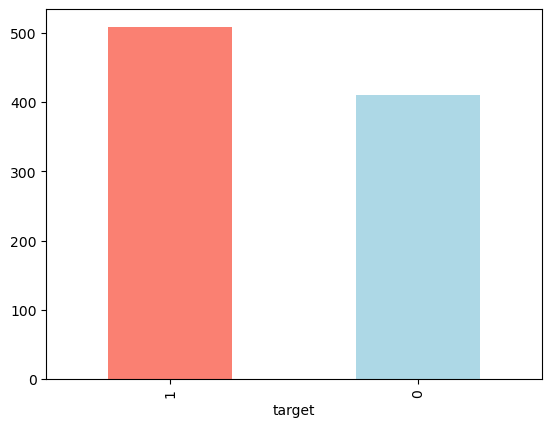

In [14]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        920 non-null    float64
 14  thal      920 non-null    int64  
 15  target    920 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 115.1 KB


In [16]:
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,0.789130,1.238043,1.782609,132.495326,200.614457,0.150000,0.989130,136.764837,0.416304,0.968458,1.275000,0.493478,1.482609,0.553261
std,265.725422,9.424685,0.408148,1.130673,0.956350,18.552583,109.373153,0.357266,0.632706,25.386936,0.493213,1.114437,0.598716,0.779191,0.629110,0.497426
min,1.000000,28.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,230.750000,47.000000,1.000000,0.000000,1.000000,120.000000,177.750000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,460.500000,54.000000,1.000000,1.000000,1.000000,130.000000,224.500000,0.000000,1.000000,138.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,690.250000,60.000000,1.000000,2.000000,3.000000,140.132500,268.000000,0.000000,1.000000,156.000000,1.000000,1.800000,2.000000,1.000000,2.000000,1.000000
max,920.000000,77.000000,1.000000,3.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Heart Disease Frequency according to Sex


In [18]:
df.sex.value_counts()


sex
1    726
0    194
Name: count, dtype: int64

In [19]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,144,267
1,50,459


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

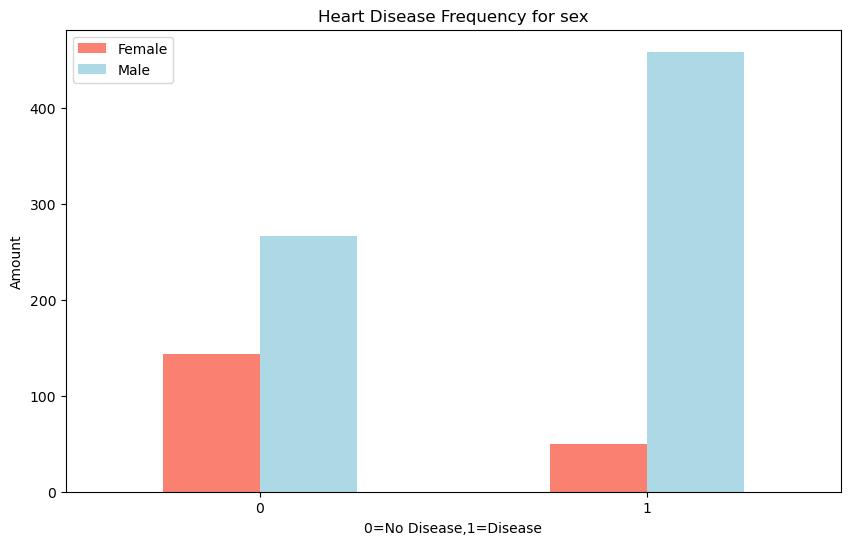

In [20]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)

## Age VS Max Heart Rate for Heart Disease

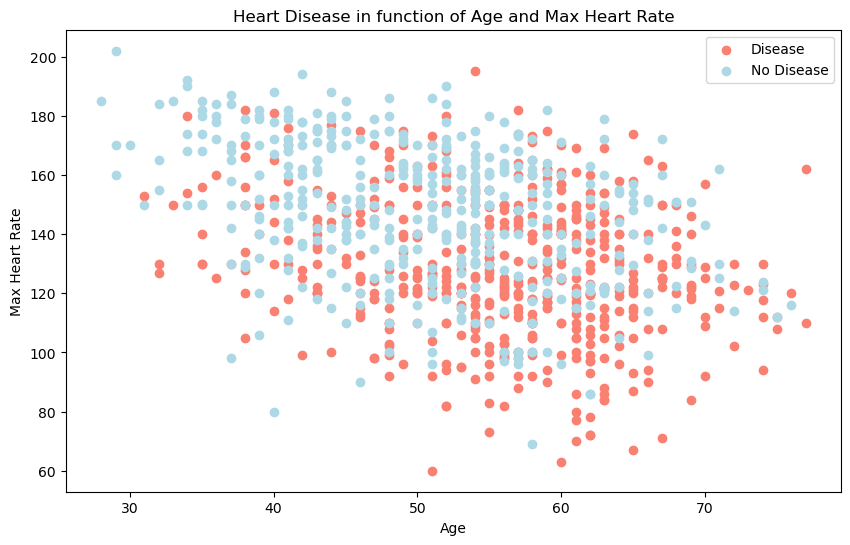

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalch[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalch[df.target==0],c="lightblue");
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

## Age Distribution

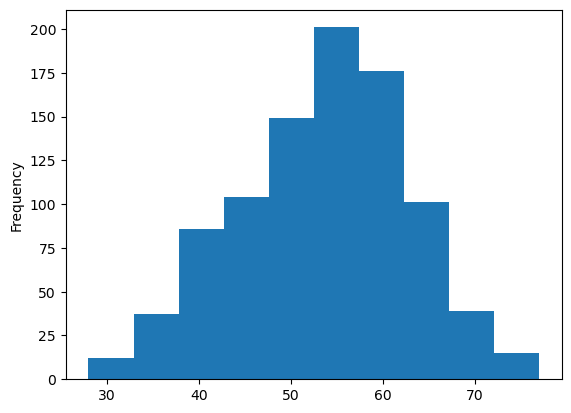

In [22]:
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type 

In [23]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
1,104,392
2,150,24
3,131,73
4,26,20


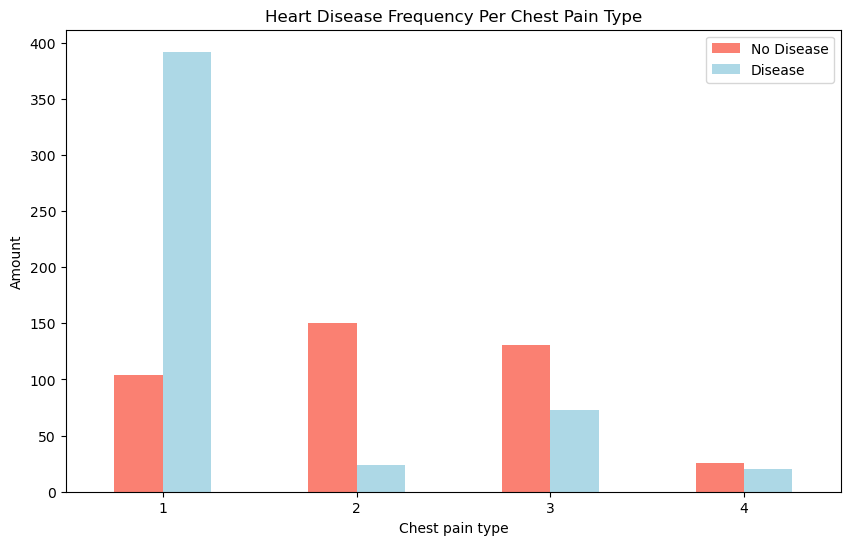

In [24]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [25]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1,0,4,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,1,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,1,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,3,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,2,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


## Corelation Matrix

In [26]:
df.corr()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
id,1.000000,0.239301,0.280053,0.949062,-0.189430,0.077057,-0.365292,0.148983,0.477652,-0.475992,0.303491,0.155919,-0.346826,0.037156,0.290549,0.356086
age,0.239301,1.000000,0.056889,0.235076,-0.076519,0.255688,-0.084434,0.219915,-0.006914,-0.376821,0.217080,0.292128,-0.289115,0.414009,0.255313,0.282700
sex,0.280053,0.056889,1.000000,0.285734,-0.125933,0.008733,-0.189922,0.075370,0.071175,-0.190192,0.198721,0.136113,-0.149841,0.135955,0.265397,0.307284
dataset,0.949062,0.235076,0.285734,1.000000,-0.150334,0.049219,-0.406969,0.170110,0.459938,-0.426389,0.282598,0.168657,-0.328274,0.048080,0.263589,0.295696
cp,-0.189430,-0.076519,-0.125933,-0.150334,1.000000,-0.018588,0.061590,0.006370,-0.074044,0.285151,-0.354664,-0.146332,0.178639,-0.159610,-0.179916,-0.385077
trestbps,0.077057,0.255688,0.008733,0.049219,-0.018588,1.000000,0.088148,0.167743,0.028747,-0.115447,0.159611,0.180346,-0.091589,0.114484,0.124138,0.109322
chol,-0.365292,-0.084434,-0.189922,-0.406969,0.061590,0.088148,1.000000,0.089931,-0.200316,0.222871,-0.028568,0.049655,0.090710,-0.118801,-0.120451,-0.225248
fbs,0.148983,0.219915,0.075370,0.170110,0.006370,0.167743,0.089931,1.000000,0.026476,-0.057882,0.058974,0.109420,-0.152360,0.175507,0.040667,0.108071
restecg,0.477652,-0.006914,0.071175,0.459938,-0.074044,0.028747,-0.200316,0.026476,1.000000,-0.181774,0.091230,0.029141,-0.063913,-0.042080,0.059667,0.057160
thalch,-0.475992,-0.376821,-0.190192,-0.426389,0.285151,-0.115447,0.222871,-0.057882,-0.181774,1.000000,-0.367124,-0.178645,0.411241,-0.220096,-0.278904,-0.391133


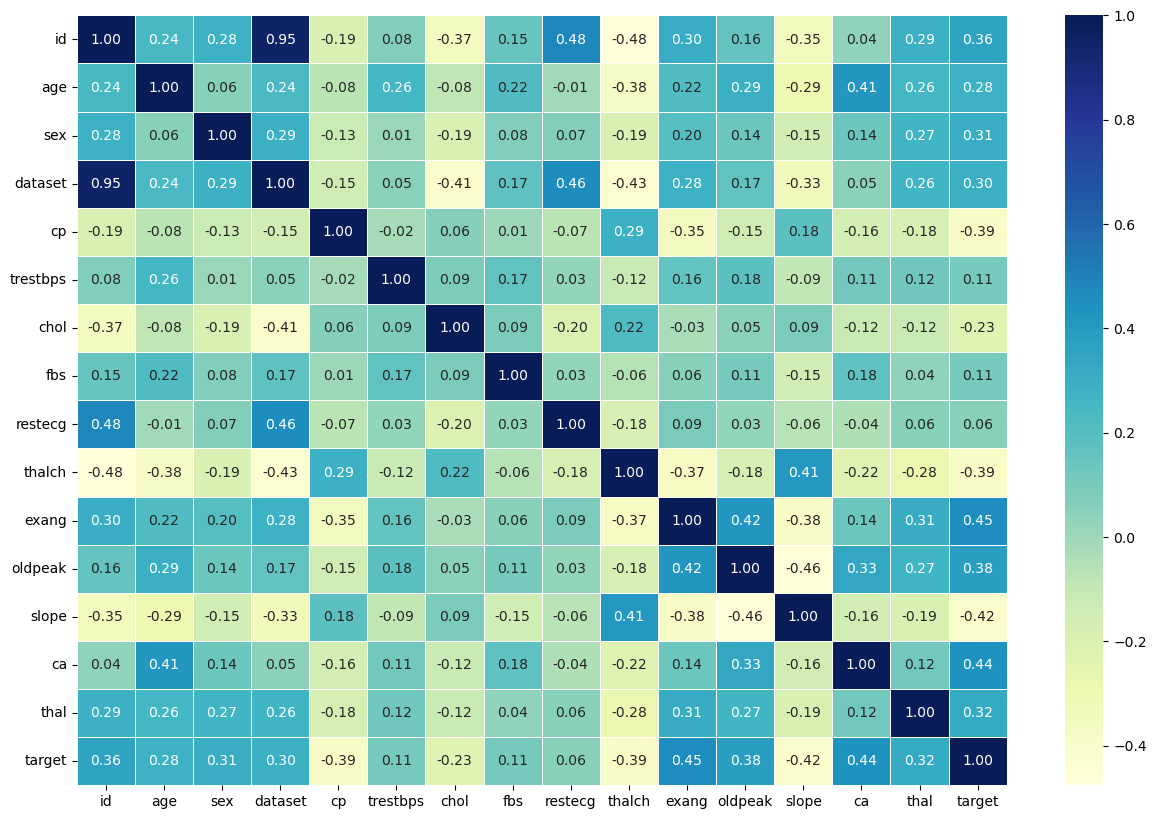

In [27]:
corr_matrix=df.corr()
fif,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");


## Modelling 

In [28]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1,0,4,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,1,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,1,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,3,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,2,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [29]:
# Split the data into X and Y 
X=df.drop("target",axis=1)
Y=df["target"]

In [30]:
X

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,1,0,4,145.00,233.0,1,0,150.00,0,2.300,0,0.0,0
1,2,67,1,0,1,160.00,286.0,0,0,108.00,1,1.500,1,3.0,1
2,3,67,1,0,1,120.00,229.0,0,0,129.00,1,2.600,1,2.0,2
3,4,37,1,0,3,130.00,250.0,0,1,187.00,0,3.500,0,0.0,1
4,5,41,0,0,2,130.00,204.0,0,0,172.00,0,1.400,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,1,127.00,333.0,1,2,154.00,0,0.000,1,0.0,1
916,917,62,1,3,4,140.81,139.0,0,2,120.63,1,1.969,1,0.0,2
917,918,55,1,3,1,122.00,223.0,1,2,100.00,0,0.000,1,0.0,0
918,919,58,1,3,1,147.36,385.0,1,0,117.48,1,2.234,0,0.0,2


In [31]:
Y

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: target, Length: 920, dtype: int64

In [32]:
# Split the data into train and test sets 
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [33]:
X_train

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
880,881,62,1,3,1,149.11,170.00,0,2,120.00,1,3.000,0,1.0,2
457,458,54,1,1,3,150.00,220.01,0,1,122.00,0,0.000,2,0.0,2
797,798,51,1,3,3,133.63,339.00,0,1,129.97,1,3.163,1,1.0,2
25,26,50,0,0,3,120.00,219.00,0,1,158.00,0,1.600,1,0.0,1
84,85,52,1,0,2,120.00,325.00,0,1,172.00,0,0.200,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,59,1,0,1,140.00,177.00,0,1,162.00,1,0.000,2,1.0,2
270,271,61,1,0,1,140.00,207.00,0,0,138.00,1,1.900,2,1.0,2
860,861,75,1,3,1,160.00,310.00,1,1,112.00,1,2.000,0,0.0,2
435,436,53,0,1,2,140.00,216.00,0,1,142.00,1,2.000,1,0.0,1


In [34]:
len(Y_train)

736

Going to try 3 different models :
1) Logistic Regression 
2) K-Nearest Neighbours Classifier 
3) Random Forest Classifier

In [37]:
# Puting models in a dictionary 
models={"Logistic Regresssion":LogisticRegression(),"KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}
# Create a function to fit and score models 
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores 
    

In [38]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)
model_scores

C:\Users\dell\ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regresssion': 0.8260869565217391,
 'KNN': 0.8369565217391305,
 'Random Forest': 0.8641304347826086}

## Model Comparison 

<Axes: >

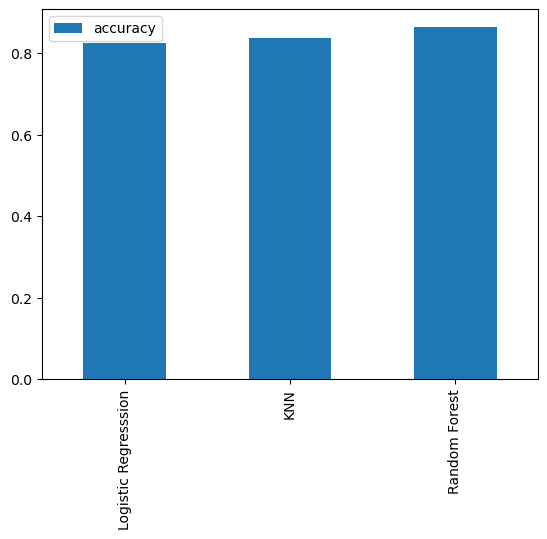

In [55]:
model_compare =pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

 Now looking at:
 * Hyperparameter tuning
 * Feature Importance
 * Confusion Matrix
 * Cross-validation
 * Precision
 * Recall
 * F1 Score
 * Classification Report
 * ROC Curve
 * Area Under the Curve (AUC)


## Hyperparameter Tuning 

In [56]:
# Tuning KNN 
train_scores =[]
test_scores =[]
neighbors= range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [57]:
train_scores

[1.0,
 0.8831521739130435,
 0.8668478260869565,
 0.84375,
 0.8464673913043478,
 0.8301630434782609,
 0.8288043478260869,
 0.8125,
 0.813858695652174,
 0.8125,
 0.8125,
 0.811141304347826,
 0.8206521739130435,
 0.8165760869565217,
 0.8152173913043478,
 0.8220108695652174,
 0.8152173913043478,
 0.813858695652174,
 0.811141304347826,
 0.813858695652174]

In [58]:
test_scores

[0.7608695652173914,
 0.6902173913043478,
 0.7989130434782609,
 0.782608695652174,
 0.8369565217391305,
 0.8097826086956522,
 0.8152173913043478,
 0.782608695652174,
 0.8206521739130435,
 0.8097826086956522,
 0.8097826086956522,
 0.8043478260869565,
 0.8097826086956522,
 0.8043478260869565,
 0.8152173913043478,
 0.8043478260869565,
 0.8206521739130435,
 0.8043478260869565,
 0.8043478260869565,
 0.7880434782608695]

 Maimum KNN score on the test data :83.70%


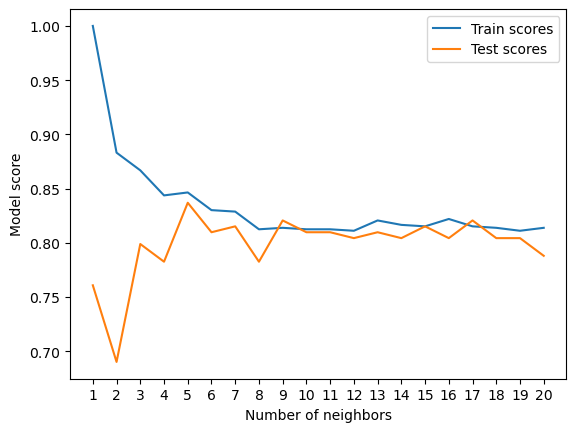

In [59]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f" Maimum KNN score on the test data :{max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

In [60]:
# Create a hyperparameter grid for LogisticRegresiion 
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}

In [61]:
# Tune LogisticRegression Model
np.random.seed(42)
# Set up random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,
                              verbose=True)
#Fit random hyperparameter search model for Logestic Regression 
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [62]:
rs_log_reg.score(X_test,Y_test)

0.8097826086956522

In [63]:
# Now for RandomForestClassifier 
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [64]:
rs_rf.score(X_test,Y_test)

0.9021739130434783

In [65]:
## Hyperparameter Tuning with GridSearchCV 


In [66]:
# Different hyperparameters for our LogisticRegression model 
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression 
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
#Fit grid hyperparameter search model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [67]:
gs_log_reg.score(X_test,Y_test)

0.8097826086956522

In [72]:
# Now for RandomForestClassifier 

np.random.seed(42)
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,5),"min_samples_leaf":np.arange(1,20,5)}
gs_rf=GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,cv=5,verbose=True)
gs_rf.fit(X_train,Y_train)


Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  6, 11, 16]),
                         'min_samples_split': array([ 2,  7, 12, 17]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [73]:
gs_rf.score(X_test,Y_test)

0.8913043478260869

In [74]:
## Make prediction with tuned model 
y_preds=rs_rf.predict(X_test)

In [75]:
y_preds

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [76]:
Y_test

319    0
377    0
538    1
296    1
531    1
      ..
382    0
97     1
906    1
467    0
732    1
Name: target, Length: 184, dtype: int64

## ROC Curve

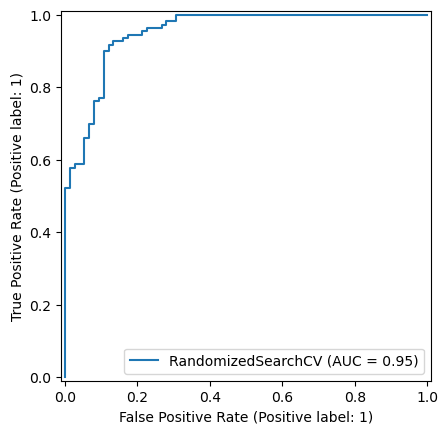

In [84]:
RocCurveDisplay.from_estimator(rs_rf,X_test,Y_test)

## Confusion Matrix

In [85]:
print(confusion_matrix(Y_test,y_preds))

[[ 66   9]
 [  9 100]]


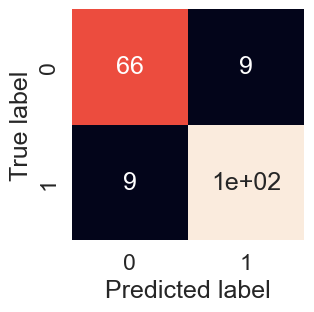

In [89]:
sns.set(font_scale=1.5)
def plot_conf_mat(Y_test,y_preds):
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
   
plot_conf_mat(Y_test,y_preds)

In [90]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        75
           1       0.92      0.92      0.92       109

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [91]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [94]:
clf=RandomForestClassifier(n_estimators= 260,
 min_samples_split= 16,
 min_samples_leaf= 9,
 max_depth= 10)

In [95]:
## Cross validated accuracy 
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc

array([0.72826087, 0.7173913 , 0.99456522, 0.95108696, 0.60869565])

In [104]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8

In [98]:
## Cross validated precision 
cv_precision=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_precision

array([1.        , 0.82278481, 1.        , 0.95192308, 0.5862069 ])

In [105]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8721829567202766

In [100]:
## Cross validated recall 
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_recall

array([0.51485149, 0.60784314, 0.99019608, 0.96078431, 1.        ])

In [106]:
cv_recall=np.mean(cv_recall)
cv_recall

0.8147350029120559

In [102]:
## Cross validated f1-score
cv_f1=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1

array([0.7375    , 0.7       , 0.99009901, 0.95609756, 0.73913043])

In [107]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8245654011318416

<Axes: title={'center': 'Cross-Validated classification metrics'}>

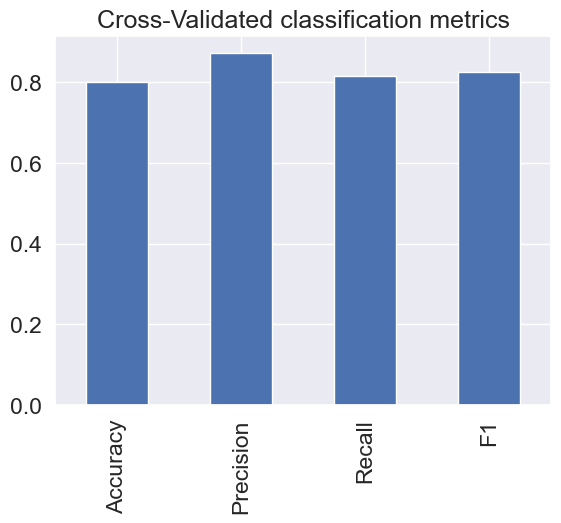

In [108]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated classification metrics",legend=False)

## Feature Importance

In [39]:
clf=RandomForestClassifier(n_estimators= 260,
 min_samples_split= 16,
 min_samples_leaf= 9,
 max_depth= 10)
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=9, min_samples_split=16,
                       n_estimators=260)

In [42]:
clf.feature_importances_

array([0.26127733, 0.02809474, 0.01456414, 0.05873807, 0.11827144,
       0.01543807, 0.0398722 , 0.00136869, 0.00794966, 0.03324637,
       0.060792  , 0.057495  , 0.04255293, 0.16714772, 0.09319165])

In [48]:
feature_dict=dict(zip(df.columns,clf.feature_importances_))
feature_dict

{'id': 0.26127732560928096,
 'age': 0.028094735728958764,
 'sex': 0.014564137652565695,
 'dataset': 0.05873806733944003,
 'cp': 0.11827143861245686,
 'trestbps': 0.015438073837051187,
 'chol': 0.03987220291449861,
 'fbs': 0.0013686907869100544,
 'restecg': 0.007949662511118548,
 'thalch': 0.0332463692022516,
 'exang': 0.060791997688750335,
 'oldpeak': 0.057494997537731324,
 'slope': 0.042552934974353654,
 'ca': 0.16714771755322408,
 'thal': 0.09319164805140845}

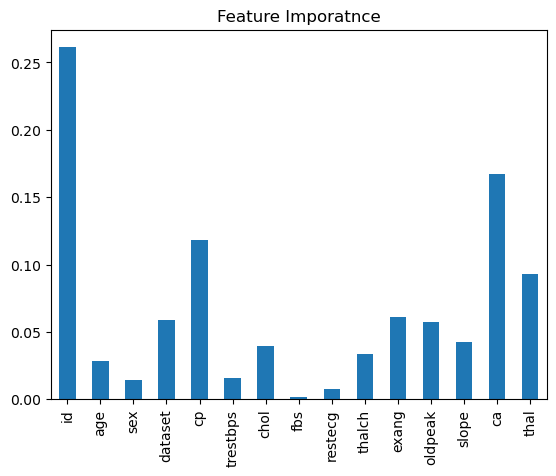

In [49]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Imporatnce",legend=False);

## Experimenting other models

In [3]:
from catboost import CatBoostClassifier

In [38]:
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1,
                           verbose=False)

# Fit the model to the training data
model.fit(X_train, Y_train)

In [44]:
model.score(X_test,Y_test)

0.8858695652173914

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define and train the model
model = XGBClassifier()
model.fit(X_train, Y_train)

# Evaluate using .score()
accuracy = model.score(X_test, Y_test)  # Works here
print(f"Accuracy: {accuracy:.2f}")

# OR use accuracy_score explicitly
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88
Accuracy: 0.88


## CONCLUSION

In this study, we trained various powerful machine learning models, namely Random Forest,LogisticRegression ,K-Nearest Neighbours Classifier,
CatBoostClassifier and XGB Classifier, to address our classification task. After an extensive hyperparameter tuning process, we achieved optimal 
configurations for each model. 
The Random Forest model demonstrated robust performance with a set of hyperparameters, including a max_depth=10, min_samples_leaf=9 , 
min_samples_split=16, n_estimators=260. This resulted in an impressive accuracy of 90.21% on the test set.